## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [89]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

TypeError: strptime() argument 1 must be str, not datetime.datetime

In [91]:
# augment engagement records with has_visited boolean flag
for engagement_record in daily_engagement:
    engagement_record['has_visited'] = True if engagement_record['num_courses_visited'] > 0 else False
    engagement_record['account_key'] = engagement_record['acct']
    engagement_record.pop('acct')
    
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited', True)])

In [92]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

TypeError: strptime() argument 1 must be str, not datetime.datetime

## Investigating the Data

In [94]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def list_keys(list):
    keys = set()
    for item in list:
        keys.add(item['account_key'])
    return keys

enrollment_keys = list_keys(enrollments)
daily_engagement_keys = list_keys(daily_engagement)
project_submission_keys = list_keys(project_submissions)

print("total rows in enrollments = {}".format(len(enrollments)))
print("unique students in enrollments = {}".format(len(enrollment_keys)))

print("total rows in daily engagements = {}".format(len(daily_engagement)))
print("unique students in daily engagements = {}".format(len(daily_engagement_keys)))

print("total rows in project submissions = {}".format(len(project_submissions)))
print("unique students in project submissions = {}".format(len(project_submission_keys)))

total rows in enrollments = 1640
unique students in enrollments = 1302
total rows in daily engagements = 136240
unique students in daily engagements = 1237
total rows in project submissions = 3642
unique students in project submissions = 743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for each in daily_engagement:
    each['account_key'] = each['acct']
    each.pop('acct')

daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

## Missing Engagement Records

In [95]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrol in enrollments:
    if enrol['account_key'] not in daily_engagement_keys:
        print(enrol)
        break;

    

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [96]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

counter_zero = 0
counter_none = 0

for enrol in enrollments:
    if enrol['account_key'] not in daily_engagement_keys:
        if enrol['days_to_cancel'] is None:
            counter_none += 1
            print(enrol)  
        elif int(enrol['days_to_cancel']) > 0:
            counter_zero += 1
            print(enrol)

print(counter_zero)        
print(counter_none)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
2
1


## Tracking Down the Remaining Problems

In [97]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [98]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [99]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [100]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

def get_committed_students(list):
    students = {}
    for item in list:
        if not item['is_canceled'] or item['days_to_cancel'] > 7:
            account_key = item['account_key']
            join_date = item['join_date']
            
            if account_key not in students or students[account_key] < join_date:
                students[account_key] = join_date
    
    return students
    

paid_students = get_committed_students(non_udacity_enrollments)

print(len(paid_students))
print(paid_students[list(paid_students.keys())[0]])

995
2015-03-10 00:00:00


## Getting Data from First Week

In [101]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [102]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_trial_accounts(list):
    new_list = []
    for item in list:
        if item['account_key'] in paid_students:
            new_list.append(item)

    return new_list


paid_enrollments = remove_trial_accounts(non_udacity_enrollments)
paid_engagement = remove_trial_accounts(non_udacity_engagement)
paid_submissions = remove_trial_accounts(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))


def get_first_week(engagement, students):
    first_week = []
    for record in engagement:
        join_date = students[record['account_key']]
        engagement_date = record['utc_date']
        if within_one_week(join_date, engagement_date):
            first_week.append(record)
              
    return first_week

paid_engagement_in_first_week = get_first_week(paid_engagement, paid_students)
print(len(paid_engagement_in_first_week))

1293
134549
3618
6919


## Exploring Student Engagement

In [109]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def list_as_dict(collection, key):
    new_dict = defaultdict(list)
    for record in collection:
        account_key = record[key]
        new_dict[account_key].append(record)
    
    return new_dict

engagement_by_account = list_as_dict(paid_engagement_in_first_week, 'account_key')
engagement_by_account['0'][0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited', True)])

In [151]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def aggregate_records(collection, column):
    print('aggregating by ', column)
    total_by_key = {}
    for key, records in collection.items():
        total = 0
        for record in records:
            total += record[column]
        total_by_key[key] = total
        
    return total_by_key

total_minutes_by_account = aggregate_records(engagement_by_account, 'total_minutes_visited')

# for account_key, engagement_for_student in engagement_by_account.items():
#     total_minutes = 0
#     for engagement_record in engagement_for_student:
#         total_minutes += engagement_record['total_minutes_visited']
#     total_minutes_by_account[account_key] = total_minutes

aggregating by  total_minutes_visited


In [152]:
import numpy as np

# Summarize the data about minutes spent in the classroom
def describe_data(data):
    total = data.values()
    print('Mean:', np.mean(list(total)))
    print('Standard deviation:', np.std(list(total)))
    print('Minimum:', np.min(list(total)))
    print('Maximum:', np.max(list(total)))
    
describe_data(total_minutes_by_account)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [106]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

for key, value in total_minutes_by_account.items():
    if value > 10000:
        large_engagement = engagement_by_account[key]
        for engagement in large_engagement:
            print(engagement)
        break
        


## Lessons Completed in First Week

In [107]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = aggregate_records(engagement_by_account, 'lessons_completed')
describe_data(total_lessons_by_account)


Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [108]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total_visits_by_account = aggregate_records(engagement_by_account, 'has_visited')
describe_data(total_visits_by_account)


Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [147]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

def get_possible_values(data, colname):
    values = set()
    for record in data:
#         if record['lesson_key'] in lesson_keys:
        values.add(record[colname])
    return values

print(list(get_possible_values(paid_submissions, 'assigned_rating')))
print(list(get_possible_values(paid_submissions, 'processing_state')))

def filter_data(data, colname, values, invert=False):
    filtered_data = []
    for record in data:
        if not invert:
            if record[colname] in values:
                filtered_data.append(record)
        else:
            if record[colname] not in values:
                filtered_data.append(record)
    return filtered_data
        

passing_ratings = ['PASSED', 'DISTINCTION']
subway_submissions = filter_data(paid_submissions, 'lesson_key', subway_project_lesson_keys)
print('subway submissions = ', len(subway_submissions))

passing_submissions = filter_data(subway_submissions, 'assigned_rating', passing_ratings)
non_passing_submissions = filter_data(subway_submissions, 'assigned_rating', passing_ratings, True)

print('passing submissions = ', len(passing_submissions))
print('non passing submission = ', len(non_passing_submissions))

passing_keys = list_keys(passing_submissions)
non_passing_keys = list_keys(non_passing_submissions)

print('passing keys = ', len(passing_keys))
print('non passing keys = ', len(non_passing_keys))

# check if there is an overlap between passing and non passing keys
count_overlap = 0
for key in passing_keys:
    if key in non_passing_keys:
        count_overlap += 1

print('overlaps = ', count_overlap)

# there seems to be a lot of overlaps, this could mean that there are multiple submissions per account key
# I shouldn't be checking what are the non passing submissions, but the accounts keys that don't have any passing submission

# passing keys =  647
# non passing keys =  481
# overlaps =  448

# paid engagements =  6919
# passing engagements =  4527
# non passing engagements =  3365

def filter_by_keys(data, keylist, invert=False):
    filtered_data = []
    for record in data:
        if not invert and record['account_key'] in keylist:
            filtered_data.append(record)
        elif invert and record['account_key'] not in keylist:
            filtered_data.append(record)
    return filtered_data

passing_engagement = filter_by_keys(paid_engagement_in_first_week, passing_keys)
non_passing_engagement = filter_by_keys(paid_engagement_in_first_week, passing_keys, invert=True)

print('paid engagements = ', len(paid_engagement_in_first_week))
print('passing engagements = ', len(passing_engagement))
print('non passing engagements = ', len(non_passing_engagement))

['', 'UNGRADED', 'INCOMPLETE', 'PASSED', 'DISTINCTION']
['CREATED', 'EVALUATED']
subway submissions =  1497
passing submissions =  652
non passing submission =  845
passing keys =  647
non passing keys =  481
overlaps =  448
paid engagements =  6919
passing engagements =  4527
non passing engagements =  2392


In [149]:
# get submissions as a dictionary of accounts
passing_engagement_by_account = list_as_dict(passing_engagement, 'account_key')
non_passing_engagement_by_account = list_as_dict(non_passing_engagement, 'account_key')

print(len(passing_engagement_by_account))
print(len(non_passing_engagement_by_account))        
print(len(engagement_by_account))

647
348
995


## Comparing the Two Student Groups

In [155]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = list_as_dict(passing_engagement, 'account_key')
non_passing_engagement_by_account = list_as_dict(non_passing_engagement, 'account_key')

print('data for passing accounts')
print('=========================')

passing_total_minutes_by_account = aggregate_records(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_total_minutes_by_account)

passing_total_lessons_by_account = aggregate_records(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_total_lessons_by_account)

passing_total_visits_by_account = aggregate_records(passing_engagement_by_account, 'has_visited')
describe_data(passing_total_visits_by_account)

passing_total_courses_by_account = aggregate_records(passing_engagement_by_account, 'num_courses_visited')
describe_data(passing_total_courses_by_account)

passing_total_projects_by_account = aggregate_records(passing_engagement_by_account, 'projects_completed')
describe_data(passing_total_projects_by_account)


print('data for non passing accounts')
print('=============================')

nonpass_total_minutes_by_account = aggregate_records(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(nonpass_total_minutes_by_account)

nonpass_total_lessons_by_account = aggregate_records(non_passing_engagement_by_account, 'lessons_completed')
describe_data(nonpass_total_lessons_by_account)

nonpass_total_visits_by_account = aggregate_records(non_passing_engagement_by_account, 'has_visited')
describe_data(nonpass_total_visits_by_account)

nonpass_total_courses_by_account = aggregate_records(non_passing_engagement_by_account, 'num_courses_visited')
describe_data(nonpass_total_courses_by_account)

nonpass_total_projects_by_account = aggregate_records(non_passing_engagement_by_account, 'projects_completed')
describe_data(nonpass_total_projects_by_account)




data for passing accounts
aggregating by  total_minutes_visited
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
aggregating by  lessons_completed
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
aggregating by  has_visited
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
aggregating by  num_courses_visited
Mean: 4.726429675425039
Standard deviation: 3.7002397793039687
Minimum: 0
Maximum: 25
aggregating by  projects_completed
Mean: 0.00927357032457496
Standard deviation: 0.1108095723581757
Minimum: 0
Maximum: 2
data for non passing accounts
aggregating by  total_minutes_visited
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
aggregating by  lessons_completed
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
aggregating by  has_visited
Mean: 1.9051724137931034
Standard 

## Making Histograms

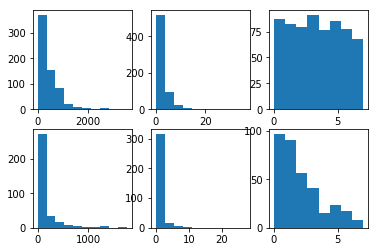

In [172]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,3)
fig.figsize = (8,8)

axes[0,0].hist(passing_total_minutes_by_account.values());\
axes[0,1].hist(passing_total_lessons_by_account.values());
axes[0,2].hist(passing_total_visits_by_account.values(), 8);

axes[1,0].hist(nonpass_total_minutes_by_account.values());
axes[1,1].hist(nonpass_total_lessons_by_account.values());
axes[1,2].hist(nonpass_total_visits_by_account.values(), 8);



## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.